In [227]:
from keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt
import os
from os import listdir
from PIL import Image as PImage
import tensorflow as tf
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.utils import plot_model
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.resnet50 import decode_predictions
from tensorflow.keras.applications.resnet50 import ResNet50

In [228]:
img_width, img_height = 224, 224
model_pretrained = ResNet50(weights='imagenet', 
                      include_top=True, 
                      input_shape=(img_height, img_width, 3))

In [229]:
img_path = '/content/drive/MyDrive/IMAGES/img_0036.jpeg'
img = image.load_img(img_path, target_size=(img_width, img_height))
img_data = image.img_to_array(img)
img_data = np.expand_dims(img_data, axis=0)
img_data = preprocess_input(img_data)

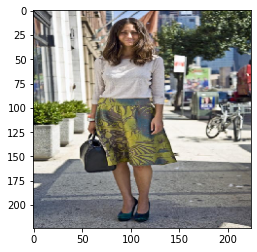

In [230]:
cnn_feature = model_pretrained.predict(img_data,verbose=0)
label = decode_predictions(cnn_feature)
plt.imshow(img)
plt.axis()
plt.show()

In [231]:
result = ('Predicted:', decode_predictions(cnn_feature, top=2)[0])

In [232]:
result # decode the results into a list of tuples (class, description, probability)

('Predicted:',
 [('n03770439', 'miniskirt', 0.97255963),
  ('n04136333', 'sarong', 0.008026085)])

In [233]:
def box_corner_to_center(boxes):
    x1, y1, x2, y2 = boxes[:, 0], boxes[:, 1], boxes[:, 2], boxes[:, 3]
    cx = (x1 + x2) / 2
    cy = (y1 + y2) / 2
    w = x2 - x1
    h = y2 - y1
    boxes = tf.stack((cx, cy, w, h), axis=-1)
    return boxes

def box_center_to_corner(boxes):
    cx, cy, w, h = boxes[:, 0], boxes[:, 1], boxes[:, 2], boxes[:, 3]
    x1 = cx - 0.5 * w
    y1 = cy - 0.5 * h
    x2 = cx + 0.5 * w
    y2 = cy + 0.5 * h
    boxes = tf.stack((x1, y1, x2, y2), axis=-1)
    return boxes

In [234]:
a,b = [60.0, 80.0, 150.0, 160.0], [55.0,30.0,140.0,80.0]

In [235]:
boxes = tf.constant((a,b))
box_center_to_corner(box_corner_to_center(boxes)) == boxes

<tf.Tensor: shape=(2, 4), dtype=bool, numpy=
array([[ True,  True,  True,  True],
       [ True,  True,  True,  True]])>

In [236]:
def bbox_to_rect(bbox, color):
    return plt.Rectangle(
        xy=(bbox[0], bbox[1]), width=bbox[2]-bbox[0], height=bbox[3]-bbox[1],
        fill=False, edgecolor=color, linewidth=2)

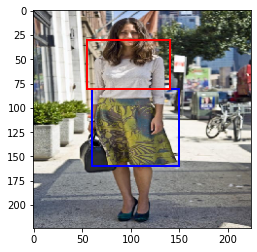

In [237]:
fig =plt.imshow(img)
fig.axes.add_patch(bbox_to_rect(a, 'blue'))
fig.axes.add_patch(bbox_to_rect(b, 'red'));
